In [13]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# create set random latitude, longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [15]:
# add coordinates to a list
coordinates = list(lat_lngs)

In [6]:
coordinates

[(75.77793132044965, 78.41869257559159),
 (-71.18685729165753, -4.992316916811575),
 (-33.2692686855197, 100.29180805470219),
 (-29.226465587729948, -132.80300080436982),
 (70.4248545590591, 74.80575785223286),
 (59.371610659124144, 123.75760159794174),
 (13.934752796680272, -30.476462948770177),
 (25.515491818442598, -148.84164624830998),
 (35.715557347193155, 158.66742762728404),
 (-89.2615726198053, 148.36967713567498),
 (-5.224873214306612, 93.45725129815389),
 (-2.178644954320575, -115.58798049349672),
 (-22.0211929126112, 152.06479375686763),
 (-16.921028846251886, -165.97997466045442),
 (78.81951394142169, -96.78452246498644),
 (-71.1549474429792, 138.86782632425326),
 (37.00805664598616, -166.121367648405),
 (46.25445295179992, -137.69695023405274),
 (64.49130123933244, 23.263604603226213),
 (-65.59711942417897, 91.88164386128153),
 (-85.6293990654976, -43.788428969559135),
 (-28.487404101810306, -154.3146442971246),
 (-23.816346995765045, -136.20560700588578),
 (-77.3032880066

In [16]:
# from citipy import citipy

# create list to hold cities
cities = []

#identify nearest city for each set of coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # add unique cities to cities list
    if city not in cities:
        cities.append(city)
        
#print city count to confirm we have the right number
len(cities)

592

In [11]:
import requests

from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [17]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | byron bay
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | camacha
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | upernavik
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | morro bay
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | emerald
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | komsom

Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | olinda
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | asau
Processing Record 46 of Set 4 | espanola
Processing Record 47 of Set 4 | tautira
Processing Record 48 of Set 4 | lae
Processing Record 49 of Set 4 | moose factory
Processing Record 50 of Set 4 | saint-paul-les-dax
Processing Record 1 of Set 5 | toulepleu
City not found. Skipping...
Processing Record 2 of Set 5 | perth
Processing Record 3 of Set 5 | sterling
Processing Record 4 of Set 5 | nago
Processing Record 5 of Set 5 | fort nelson
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | dire dawa
Processing Record 9 of Set 5 | codrington
Processing Record 10 of Set 5 | todos santos
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | bredasdorp


Processing Record 32 of Set 8 | wellington
Processing Record 33 of Set 8 | samarai
Processing Record 34 of Set 8 | yerbogachen
Processing Record 35 of Set 8 | kuandian
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | acarau
Processing Record 39 of Set 8 | pattani
Processing Record 40 of Set 8 | bossembele
City not found. Skipping...
Processing Record 41 of Set 8 | bilibino
Processing Record 42 of Set 8 | oistins
Processing Record 43 of Set 8 | katobu
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | mana
Processing Record 46 of Set 8 | road town
Processing Record 47 of Set 8 | gejiu
Processing Record 48 of Set 8 | buala
Processing Record 49 of Set 8 | cherepovets
Processing Record 50 of Set 8 | kenora
Processing Record 1 of Set 9 | klichka
Processing Record 2 of Set 9 | gornopravdinsk
Processing Record 3 of Set 9 | san juan
Processing Record 4 of Set 9 | fort saint john
City not found. Skipping...
P

Processing Record 20 of Set 12 | arlit
Processing Record 21 of Set 12 | wapakoneta
Processing Record 22 of Set 12 | namibe
Processing Record 23 of Set 12 | itaituba
Processing Record 24 of Set 12 | cotonou
Processing Record 25 of Set 12 | lensk
Processing Record 26 of Set 12 | conceicao da barra
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | dicabisagan
Processing Record 29 of Set 12 | sibu
Processing Record 30 of Set 12 | koungheul
Processing Record 31 of Set 12 | college
Processing Record 32 of Set 12 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 33 of Set 12 | ust-kuyga
Processing Record 34 of Set 12 | siwani
City not found. Skipping...
Processing Record 35 of Set 12 | beipiao
Processing Record 36 of Set 12 | venkatagiri
Processing Record 37 of Set 12 | alugan
Processing Record 38 of Set 12 | almaty
Processing Record 39 of Set 12 | tocopilla
Processing Record 40 of Set 12 | bizhbulyak
Processing Record 41 of Set 12 | mocuba
Process

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Byron Bay,-28.6500,153.6167,78.76,86,100,5.14,AU,2022-01-26 00:37:42
1,Punta Arenas,-53.1500,-70.9167,48.31,57,0,27.63,CL,2022-01-26 00:36:55
2,Camacha,33.0833,-16.3333,58.42,59,40,18.41,PT,2022-01-26 00:37:43
3,Avarua,-21.2078,-159.7750,78.85,89,100,5.75,CK,2022-01-26 00:37:43
4,Yellowknife,62.4560,-114.3525,0.55,85,75,10.36,CA,2022-01-26 00:37:44
5,Upernavik,72.7868,-56.1549,1.51,94,98,8.70,GL,2022-01-26 00:37:44
6,Puerto Ayora,-0.7393,-90.3518,73.87,88,76,6.35,EC,2022-01-26 00:37:44
7,Katsuura,35.1333,140.3000,45.19,91,100,15.23,JP,2022-01-26 00:37:45
8,Butaritari,3.0707,172.7902,82.15,79,20,16.62,KI,2022-01-26 00:37:45
9,Hobart,-42.8794,147.3294,66.02,73,75,8.05,AU,2022-01-26 00:37:40


In [19]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Byron Bay,AU,2022-01-26 00:37:42,-28.6500,153.6167,78.76,86,100,5.14
1,Punta Arenas,CL,2022-01-26 00:36:55,-53.1500,-70.9167,48.31,57,0,27.63
2,Camacha,PT,2022-01-26 00:37:43,33.0833,-16.3333,58.42,59,40,18.41
3,Avarua,CK,2022-01-26 00:37:43,-21.2078,-159.7750,78.85,89,100,5.75
4,Yellowknife,CA,2022-01-26 00:37:44,62.4560,-114.3525,0.55,85,75,10.36


In [22]:
# create output csv file
output_data_file = "Weather_Data/cities.csv"
# export to csv
city_data_df.to_csv(output_data_file, index_label="city_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'01/25/22'

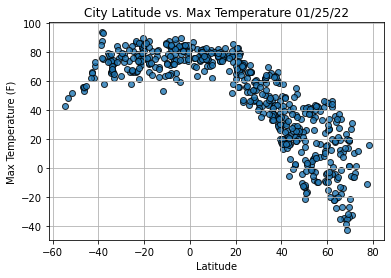

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

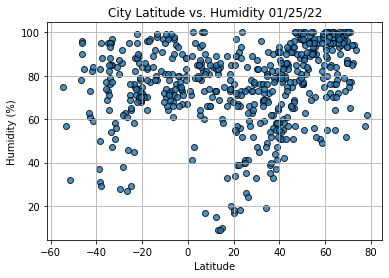

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

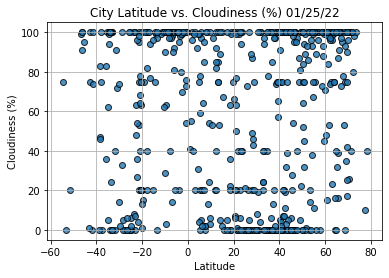

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

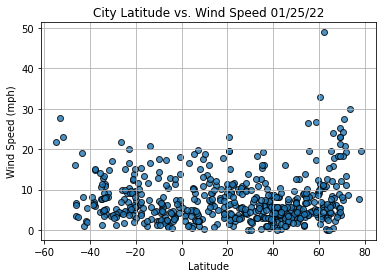

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# import linregress

from scipy.stats import linregress

# create function to perform linear regression on weather data
# and plot regression line and equation with data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate regression line "y values" from slope and intercept
    regress_values = x_values*slope + intercept
    # get equation of line
    line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    # create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # annotate text for line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [32]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-01-26 00:37:47
Lat                      -37.6167
Lng                        -73.65
Max Temp                    58.08
Humidity                       88
Cloudiness                      0
Wind Speed                  14.94
Name: 13, dtype: object

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Byron Bay,AU,2022-01-26 00:37:42,-28.6500,153.6167,78.76,86,100,5.14
1,Punta Arenas,CL,2022-01-26 00:36:55,-53.1500,-70.9167,48.31,57,0,27.63
3,Avarua,CK,2022-01-26 00:37:43,-21.2078,-159.7750,78.85,89,100,5.75
6,Puerto Ayora,EC,2022-01-26 00:37:44,-0.7393,-90.3518,73.87,88,76,6.35
9,Hobart,AU,2022-01-26 00:37:40,-42.8794,147.3294,66.02,73,75,8.05
...,...,...,...,...,...,...,...,...,...
540,Conceicao Da Barra,BR,2022-01-26 00:52:07,-18.5933,-39.7322,76.05,86,100,10.13
541,Port Hedland,AU,2022-01-26 00:52:07,-20.3167,118.5667,89.65,70,75,8.05
551,Tocopilla,CL,2022-01-26 00:52:11,-22.0920,-70.1979,68.79,68,36,5.08
553,Mocuba,MZ,2022-01-26 00:52:12,-16.8392,36.9856,72.34,96,100,5.50


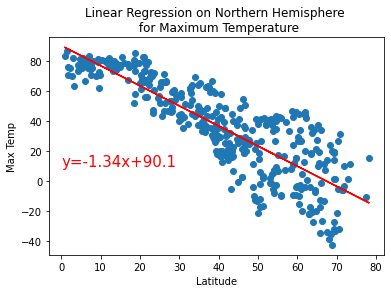

-0.8490210777532394


In [46]:
# linear regression on northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (0,10))

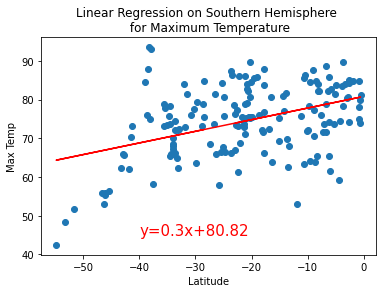

0.42450012646961993


In [47]:
# linear regression on southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-40,45))

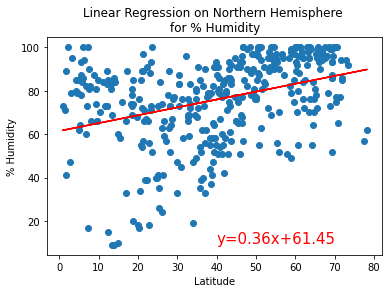

0.36118799826722275


In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

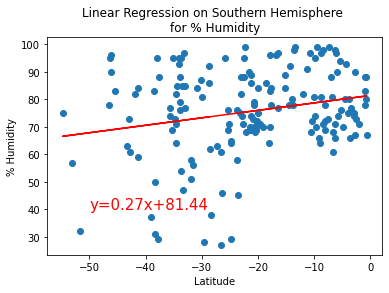

0.22625993178693013


In [57]:
# linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values,
                      'Linear Regression on Southern Hemisphere \nfor % Humidity',
                      '% Humidity', (-50,40))

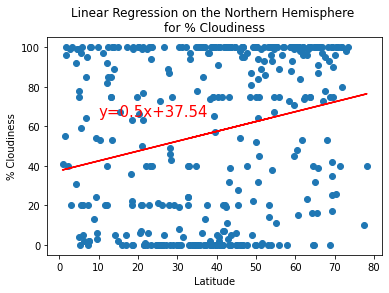

0.23617678669539255


In [59]:
# Linear regression of cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(10,65))

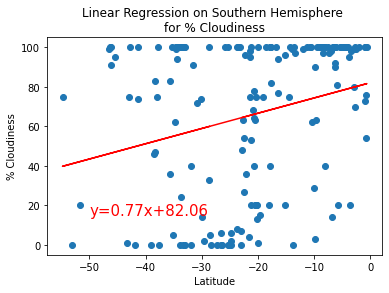

0.2580029421101497


In [62]:
# Linear regression of cloudiness on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,15))

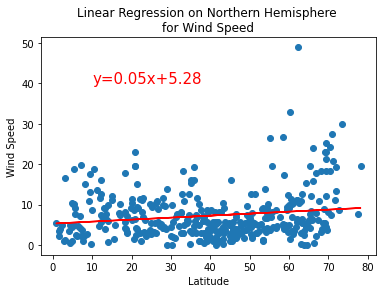

0.16219921365671627


In [64]:
# Linear regression of wind speed on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(10,40))

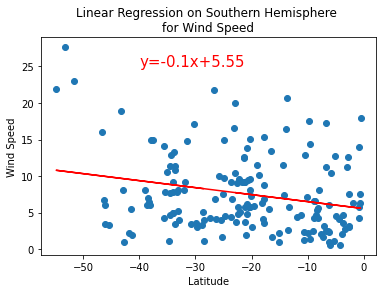

-0.23997232596369517


In [66]:
# Linear regression of wind speed on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(-40,25))